<h2><center> New York Airbnb Data Analytics and Prediction</center></h2>
<h3>TEAM MEMBERS<br>
Ajitesh Nair PES2201800681<br>
Ishan Padhy PES2201800158<br>
Nikhil J K PES2201800303</h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<h3>Loading Dataset</h3>

In [4]:
mydata=pd.read_csv('AB_NYC_2019.csv')
mydata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h2>Dataset Cleaning and Preprocessing</h2>

In [4]:
mydata.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<h3> We see that column Last_review is of type object. Hence we convert it into datetime type</h3>

In [5]:
mydata["last_review"] = pd.to_datetime(mydata["last_review"])
mydata.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

<h3>Checking for missing values.</h3>

In [6]:
mydata.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<h3>Few columns like host name,last review had many missing values and they were not of any importance for analysis,hence they will be deleted.<br>
Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.</h3>

In [3]:
mydata['reviews_per_month'].fillna(mydata['reviews_per_month'].mean(),inplace=True)
mydata.drop(columns=['host_name', 'last_review'], axis=1, inplace=True)
mydata.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<h2> Exploratory Data Analysis</h2>

<h3>Correlation</h3>

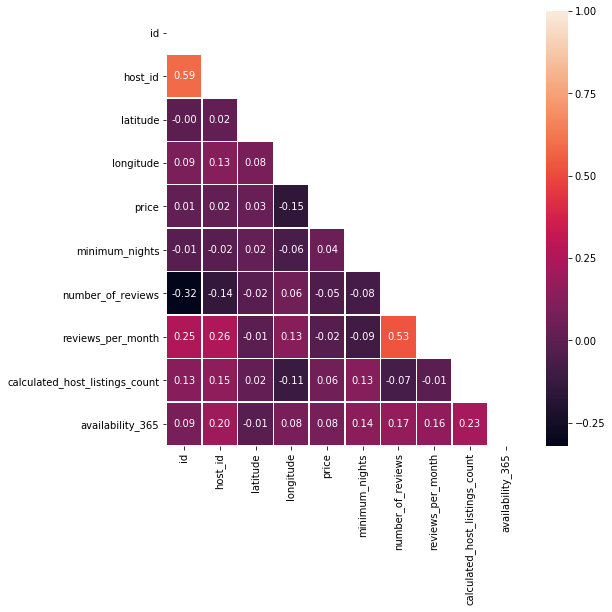

In [8]:
import seaborn as sns
corr_1 = mydata.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<h3>Correlation heatmap shows a high correlation between number of reviews and reviews per month. </h3>

<h3>Relation between neighbourhood group and availability</h3>

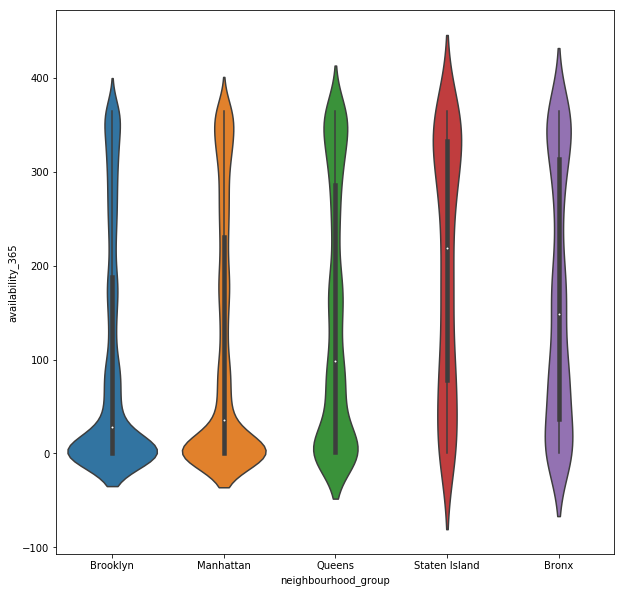

In [9]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=mydata, x="neighbourhood_group", y="availability_365")

<h3>Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others</h3>

<h3>Relation between neighbourhood group and price</h3>

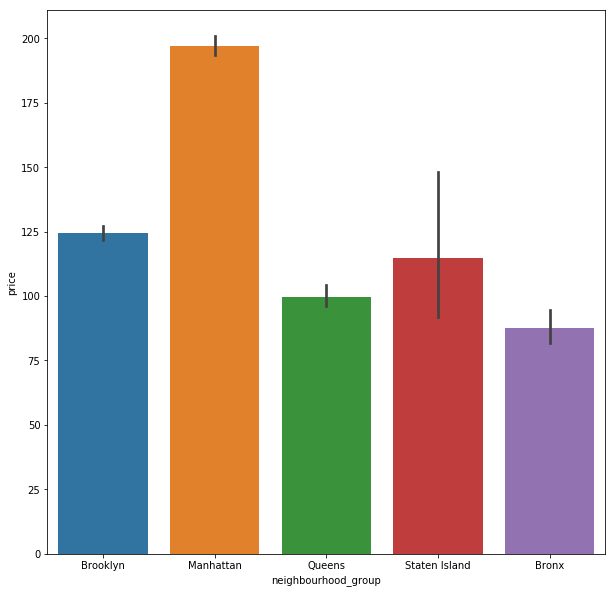

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(data=mydata, x='neighbourhood_group', y='price')

<h3>Bar plot plotted between neighbourhood group and price showas that Manhattan has the most expensive prices.</h3>

<h3>Since we have latitude and longitude of each listing, let's plot it using a scatterplot</h3>

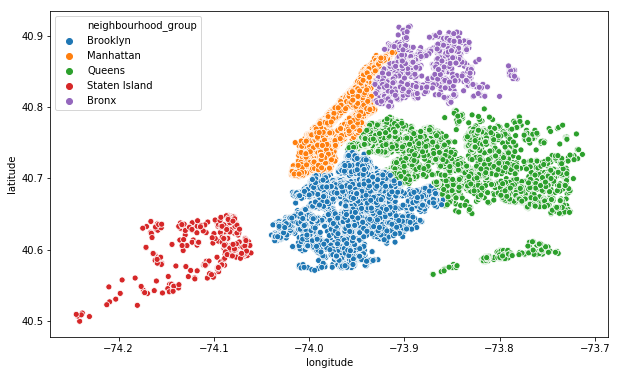

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(mydata.longitude,mydata.latitude,hue=mydata.neighbourhood_group)
plt.ioff()

### From the points on the map we can see that there is more density in the Brooklyn and Manhattan.

<h3> Now let's categorise rooms based on price 
Let price less than 75 dollars be low,<br>
between 75 and 500 dollars be medium and<br>
above 500 dollars be high</h3>

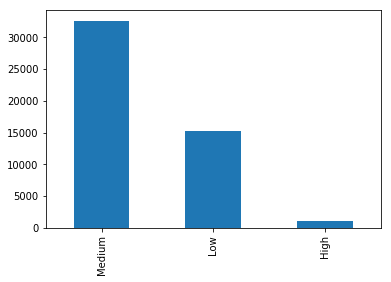

In [12]:
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
mydata['price'].apply(categorise).value_counts().plot(kind='bar');

### Most of the rooms fall in the Medium (75-500 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

### Now lets analyse the names of the listings.

<Figure size 720x432 with 0 Axes>

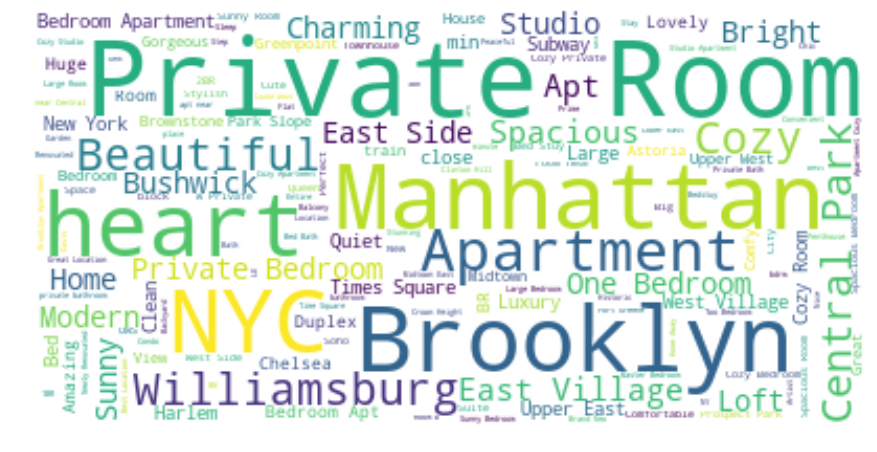

In [13]:
#word cloud

import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in mydata.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

### Our word cloud shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experience in the room.

### Now let's analyse the number of reviews

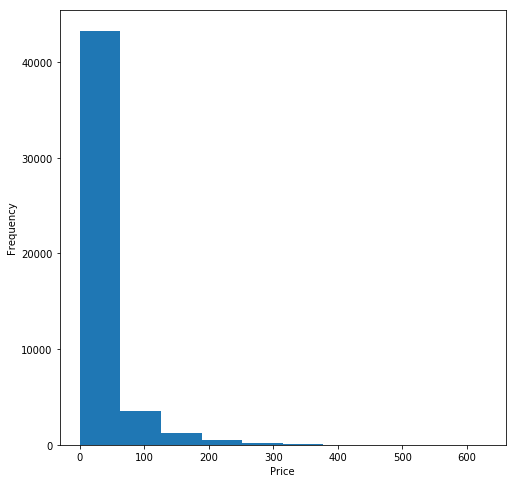

In [14]:
plt.figure(figsize=(8,8))
mydata['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

<h3> From the histogram we can see that low cost rooms or in range 0-50 $ have more reviews.This shows us that people who pay more for the rooms generally dont write reviews.It is observed people write reviews more if they are not happy with their experience.In case of costly rooms there is high possibility that the customers are happy.So they dont write much reviews.</h3>

## Models and Predictions

## Price Prediction based on name

### Let's see if we can classify a listing as cheap or expensive just based on the name

In [15]:
mydata['name'].isnull().sum()

16

### There are 16 names fields as NaN.Let's replace them with empty string.

In [5]:
mydata['name'].fillna('', inplace=True)
mydata['name'].isnull().sum()

0

### Now let's remove punctuation, digits and special characters.

In [6]:
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

mydata['clean_name'] = mydata['name'].apply(remove_punctuation_digits_specialchar)
# Let's compare raw and cleaned texts.
mydata[['name', 'clean_name']].head()

,name,clean_name
0,Clean & quiet apt home by the park,clean quiet apt home by the park
1,Skylit Midtown Castle,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,the village of harlem new york
3,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,entire apt spacious studio loft by central park


### Now let's remove stop words

In [7]:

import nltk
from nltk.util import ngrams

from nltk.corpus import stopwords


def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)
mydata['final_name'] = mydata['clean_name'].apply(tokenize_no_stopwords)
mydata[['clean_name', 'final_name']].head()

,clean_name,final_name
0,clean quiet apt home by the park,clean quiet apt home park
1,skylit midtown castle,skylit midtown castle
2,the village of harlem new york,village harlem new york
3,cozy entire floor of brownstone,cozy entire floor brownstone
4,entire apt spacious studio loft by central park,entire apt spacious studio loft central park


### Now lets define a price above 300 as expensive and below 300 as cheap.
### We divide dataset into 80% training and 20% as test dataset
### We use TF-IDF metric which we have learnt in class to represent the weights of each feature
### LGBM classifier is used which is similar to decision trees.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler
def classify_as_cheap_or_expensive(line):
    if line > 300:
        return 1
    else:
        return 0
        
mydata['target'] = mydata['price'].apply(classify_as_cheap_or_expensive)
mydata['target'].value_counts()
train, test = train_test_split(mydata, test_size=0.2, random_state=315, stratify=mydata['target'])

X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)
preds = lr.predict(X_test)

print(classification_report(y_test, preds))
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, preds)))
print("Recall: {0:.3f}".format(recall_score(y_test, preds)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      9108
           1       0.22      0.68      0.33       671

    accuracy                           0.81      9779
   macro avg       0.59      0.75      0.61      9779
weighted avg       0.92      0.81      0.85      9779

Accuracy: 0.809
Recall: 0.680


### The scores aren't perfect but taking into account that the predicting model is built solely on textual descriptions of a listing, it seems like the words in Airbnb titles actually do matter!

In [20]:
mydata.drop(columns=['target', 'clean_name'], axis=1, inplace=True)

In [21]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,entire apt spacious studio loft central park


### Now for using other models, let us first convert the categorical features into numeric by using encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(mydata['neighbourhood_group'])
mydata['neighbourhood_group']=le.transform(mydata['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(mydata['neighbourhood'])
mydata['neighbourhood']=le.transform(mydata['neighbourhood'])

le =LabelEncoder()
le.fit(mydata['room_type'])
mydata['room_type']=le.transform(mydata['room_type'])


mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194,cozy entire floor brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0,entire apt spacious studio loft central park


## Linear Regression Model

### Prices are not normally distributed as well as there is alot of noise.Hence instead of considering y, we consider log(y)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
lm = LinearRegression()
mydata=mydata[mydata.price>0]
mydata=mydata[mydata.availability_365>0]

X = mydata[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
#Prices are not normally distributed as well as there is alot of noise. Logarithmic conversion of data with huge variance can be normalised by logarithmic algorithm.
y= np.log10(mydata['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))



        Mean Squared Error: 0.23993364054603417
        R2 Score: 41.24192706830667
        Mean Absolute Error: 0.17677653373327856
     


## Decision Tree model

In [24]:
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.07953946647160076

        Mean Squared Error: 0.22889689464980478
        R2 Score: 46.52324351141029
        Mean Absolute Error: 0.16583322887806484
     


## Ridge Model

In [25]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
y_predicts = ridge_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23992898296923088
        R2 Score: 41.24420826222875
        Mean Absolute Error: 0.1767871985511428
     


## Lasso Model

In [26]:
from sklearn import linear_model
Lasso_model = linear_model.Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
y_predicts = Lasso_model.predict(X_test) 
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23990803282018353
        R2 Score: 41.254468705442136
        Mean Absolute Error: 0.1767949649280997
     


## We can see that Decision Tree model has the highest R^2 value and least error. Hence it is the best model.

In [27]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,final_name
0,2539,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365,clean quiet apt home park
1,2595,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365,village harlem new york
3,3831,Cozy Entire Floor of Brownstone,4869,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194,cozy entire floor brownstone
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,2,137,40.74767,-73.97500,0,200,3,74,0.590000,1,129,large cozy br apartment midtown east


## Recommender System

### We have implemented a recommender system which suggests an airbnb listing using the keywords the user has provided. It returns the most relevant airbnb listing.

In [9]:
from fuzzywuzzy import process

def airbnb_finder(title):
    all_titles = mydata['final_name'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]
title = airbnb_finder('village')
title

'village harlem new york'